In [2]:
from NSGPy import nsgp, plot_nsgp_1d, plot_nsgp_2d, nsgp_posterior, NSGP, plot_kernel_1d
import numpy as np

# 1D example

In [3]:
class TrueModel:
    def __init__(self, x, f):
        self.x = x
        self.f = f

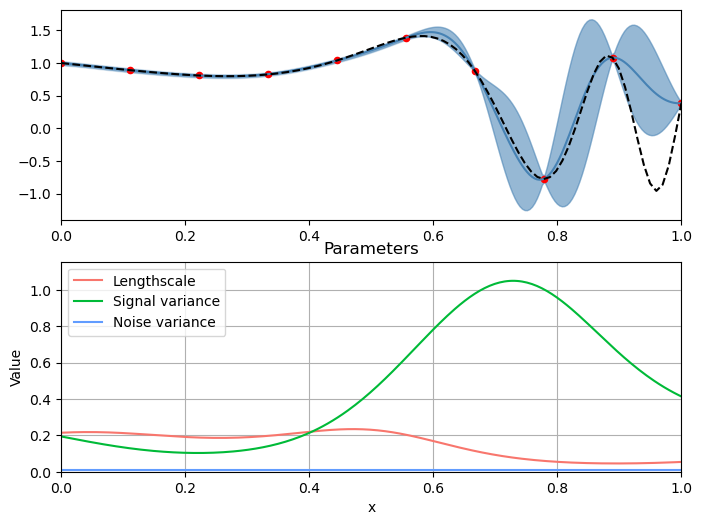

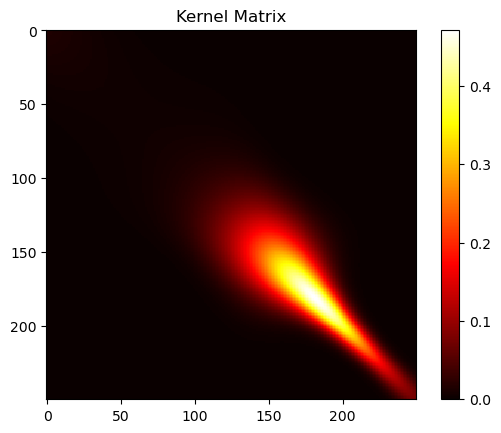

array([[1.4726048]])

In [4]:
def f_noisy(x1):
    """Generates a noisy function with added random noise."""
    return np.sin((x1 * 6) ** 4 * 0.01) + (1 - x1) + (np.random.random(x1.shape) - 0.5) * 0.5 * (1 - x1)

def f(x1):
    """Defines a smooth function without noise."""
    return np.sin((x1 * 6) ** 4 * 0.01) + (1 - x1)

# Generate training data (input values)
Xt = np.linspace(0, 1, 10).reshape(-1,1)  # 10 evenly spaced points between 0 and 1
y_pred1D = f(Xt).reshape(-1,1)  # Compute corresponding function values

# Initialize the NSGP model
lgp = NSGP()

# Define hyperparameters for the NSGP model (optional)
hyperparameters = {
    "init_lengthscale": 0.05,      # Initial lengthscale for the kernel
    "init_signal_variance": 0.3,   # Initial signal variance
    "init_noise_variance": 0.05,   # Initial noise variance
    "beta_lengthscale": 0.2,       # Controls variation of lengthscale
    "beta_signal_variance": 0.2,   # Controls variation of signal variance
    "beta_noise_variance": 0.3,    # Controls variation of noise variance
    "alpha_lengthscale": 1,        # Alpha parameter for lengthscale
    "alpha_signal_variance": 1,    # Alpha parameter for signal variance
    "alpha_noise_variance": 1,     # Alpha parameter for noise variance
    "verbose_output": False,
}

lgp.set_params(**hyperparameters)

# Set the optimization parameters (optional)
lgp.optimizer(optimizer="grad", random_restarts=5, max_iteration=5000)

# Train the NSGP model with training data
# The last argument "ls" specifies which nonstationary functions to learn (lengthscale, signal variance)
lgp.fit(Xt, y_pred1D, "ls")

# Generate test data for true function visualization (optional)
Xt_true = np.linspace(0, 1, 100).reshape(-1,1)  # 100 test points for smooth function visualization
y_true1D = f(Xt_true).reshape(-1,1)  # Compute true function values
truemodel = TrueModel(Xt_true, y_true1D)  # Store true model data for comparison

# Plot the NSGP model results
# - `plotlatent=True` to visualize learned latent parameters (like lengthscale)
# - `plotderivs=False` to disable derivative visualization
# - `truemodel=truemodel` to compare with the true function
plot_nsgp_1d(lgp.gp, plotlatent=True, plotderivs=False, truemodel=truemodel)

plot_kernel_1d(lgp.gp)

# Test the trained model with a new input (0.6)
Xt_test = np.array([0.6]).reshape(-1,1)
lgp.predict(Xt_test, return_std=False, return_cov=False)  # Get the predicted function value at x = 0.6

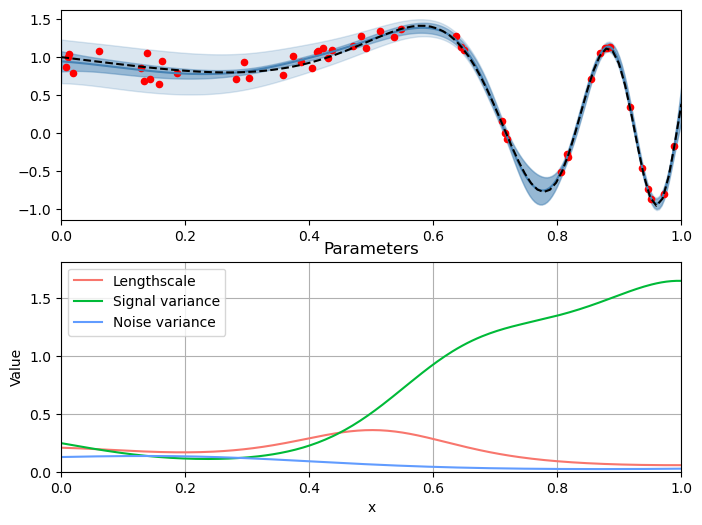

In [5]:
def f_noisy(x1):
    return np.sin((x1 * 6) ** 4 * 0.01) + (1 - x1) + (np.random.random(x1.shape) - 0.5) * 0.5 * (1 - x1)

def f(x1):
    return np.sin((x1 * 6) ** 4 * 0.01) + (1 - x1)

# Create noisy model
Xt = np.random.random((50, 1)).reshape(-1,1)
y_pred1D = f_noisy(Xt).reshape(-1,1)

# Initialize the NSGP model
lgp = NSGP()

# Define hyperparameters for the NSGP model (optional)
hyperparameters = {
    "verbose_output": False,
}

lgp.set_params(**hyperparameters)

# Set the optimization parameters (optional)
lgp.optimizer(optimizer="grad", random_restarts=5, max_iteration=5000)

# Train the NSGP model with training data
lgp.fit(Xt, y_pred1D, "lso")

# Generate test data for true function visualization (optional)
Xt_true = np.linspace(0, 1, 100).reshape(-1,1)  # 100 test points for smooth function visualization
y_true1D = f(Xt_true).reshape(-1,1)  # Compute true function values
truemodel = TrueModel(Xt_true, y_true1D)  # Store true model data for comparison

# Plot the NSGP model results
plot_nsgp_1d(lgp.gp, plotlatent=True, plotderivs=False, truemodel=truemodel)

# 2D example

Optimizing for 5 restarts ...
  model   iter stepsize       mll
ls   gp      1    -5.00    632.45
ls   gp    100    -5.77    787.18
ls   gp    108    -7.01    787.18
ls   gp      1    -5.00    490.87
ls   gp    100    -5.38    860.13
ls   gp    165    -7.00    862.42
ls   gp      1    -5.00  -4743.43
ls   gp    100    -6.36    818.86
ls   gp    149    -7.08    819.06
ls   gp      1    -5.00    605.44
ls   gp    100    -5.38    830.87
ls   gp    179    -7.01    831.80
ls   gp      1    -5.00    426.93
ls   gp    100    -5.57    810.65
ls   gp    111    -7.08    811.42
Best model mll=862.42
K_train_train nsgp jitter: 0.00014623775527214004


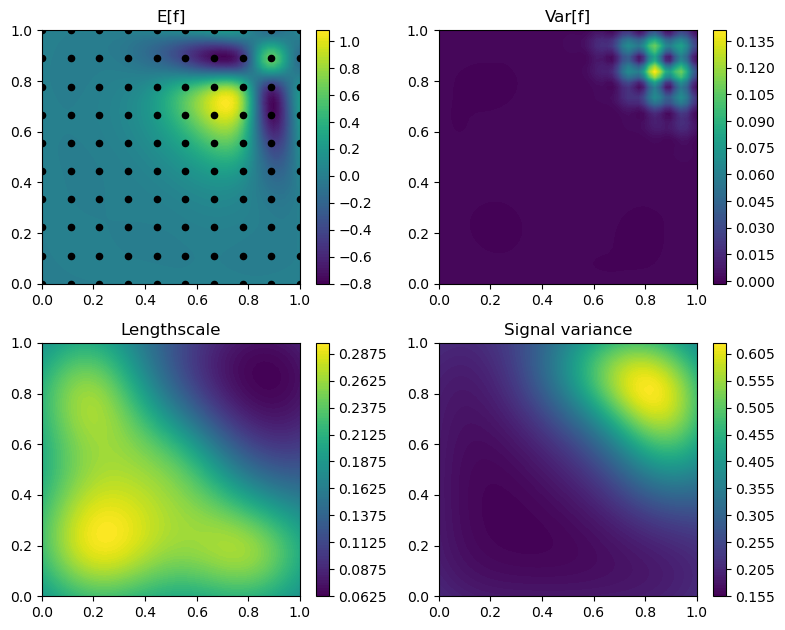

In [6]:
# Define function
def f(x1, x2):
    return np.sin((x1 * 6) ** 4 * 0.005) * np.sin((x2 * 6) ** 4 * 0.005)

# Create grid
x1 = np.linspace(0, 1, 10)
x2 = np.linspace(0, 1, 10)
X1, X2 = np.meshgrid(x1, x2)
Xt = np.column_stack((X1.ravel(), X2.ravel()))

# Compute function values
y_pred2D = f(X1, X2)

# Reshape to column vector
y_pred2D = y_pred2D.reshape(-1,1)

# Train NSGP model
lgp = nsgp(Xt, y_pred2D, 'ls', 'grad', **{"random_restarts": 5})

# Plot results
plot_nsgp_2d(lgp)

# 2D adaptive sampling 

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

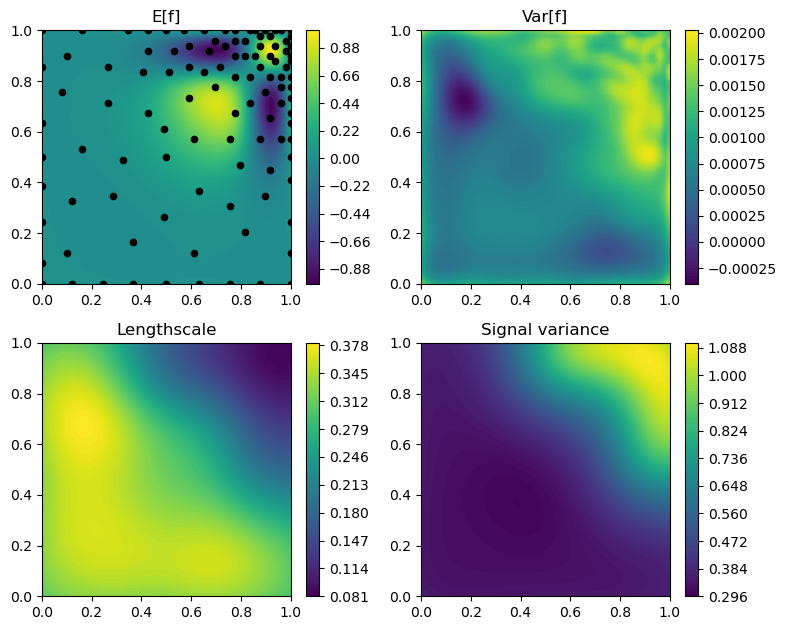

In [7]:
# adaptive sampling test:

# Define function
def f(x1, x2):
    return np.sin((x1 * 6) ** 4 * 0.005) * np.sin((x2 * 6) ** 4 * 0.005)

# Create grid
x1_train = np.linspace(0, 1, 3)
x2_train = np.linspace(0, 1, 3)
X1_train, X2_train = np.meshgrid(x1_train, x2_train)
Xt_train = np.column_stack((X1_train.ravel(), X2_train.ravel()))

# Compute function values
y_train = f(X1_train, X2_train)

# Reshape to column vector
y_train = y_train.reshape(-1,1)

for i in range(100):
    print(f"Iteration {i+1}")

    # Train NSGP model
    lgp = nsgp(Xt_train, y_train, 'ls', 'grad', **{"verbose_output": False})

    # Create evaluation grid
    x1_evaluate = np.linspace(0, 1, 50)
    x2_evaluate = np.linspace(0, 1, 50)
    X1_evaluate, X2_evaluate = np.meshgrid(x1_evaluate, x2_evaluate)
    Xt_evaluate = np.column_stack((X1_evaluate.ravel(), X2_evaluate.ravel()))

    # Compute posterior values
    _, ftstd, _, _, _ = nsgp_posterior(lgp, Xt_evaluate)

    # Find the location of highest uncertainty
    max_index = np.argmax(ftstd)  # Index of max std
    new_sample = Xt_evaluate[max_index]  # Corresponding (x1, x2) point

    # Evaluate function at new sample
    new_y = f(*new_sample).reshape(1, 1)  # Ensure it's a column vector

    # Add new sample to training set
    Xt_train = np.vstack((Xt_train, new_sample))
    y_train = np.vstack((y_train, new_y))

# Plot results
plot_nsgp_2d(lgp)